# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | ola
Processing Record 4 of Set 1 | temryuk
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | coahuayana de hidalgo
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | san antonio de pale
Processing Record 9 of Set 1 | ouesso
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | carutapera
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | hadibu
Processing Record 16 of Set 1 | iskateley
Processing Record 17 of Set 1 | tamandare
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | dikhil
Processing Record 20 of Set 1 | kobelyaky
Processing Record 21 of Set 1 | egilsstadir
Processing Record 22

Processing Record 41 of Set 4 | hermanus
Processing Record 42 of Set 4 | saint-memmie
Processing Record 43 of Set 4 | yuyao
Processing Record 44 of Set 4 | aykhal
Processing Record 45 of Set 4 | corralillo
Processing Record 46 of Set 4 | haiku-pauwela
Processing Record 47 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 48 of Set 4 | sinop
Processing Record 49 of Set 4 | kamenka
Processing Record 0 of Set 5 | margate
Processing Record 1 of Set 5 | porto novo
Processing Record 2 of Set 5 | manismata
Processing Record 3 of Set 5 | dashitou
Processing Record 4 of Set 5 | parauapebas
Processing Record 5 of Set 5 | aars
Processing Record 6 of Set 5 | maues
Processing Record 7 of Set 5 | farsan
Processing Record 8 of Set 5 | am timan
Processing Record 9 of Set 5 | ilulissat
Processing Record 10 of Set 5 | flying fish cove
Processing Record 11 of Set 5 | colonia
Processing Record 12 of Set 5 | broken hill
Processing Record 13 of Set 5 | vorgashor
Processing Record 14 of Set

Processing Record 32 of Set 8 | turinsk
Processing Record 33 of Set 8 | watsa
Processing Record 34 of Set 8 | nuku'alofa
Processing Record 35 of Set 8 | brisas de zicatela
Processing Record 36 of Set 8 | floro
Processing Record 37 of Set 8 | pacasmayo
Processing Record 38 of Set 8 | ciudad lazaro cardenas
Processing Record 39 of Set 8 | yibin
Processing Record 40 of Set 8 | yangshuo
Processing Record 41 of Set 8 | richmond
Processing Record 42 of Set 8 | castanos
Processing Record 43 of Set 8 | baruun-urt
Processing Record 44 of Set 8 | ponta pora
Processing Record 45 of Set 8 | codrington
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | conceicao da barra
Processing Record 48 of Set 8 | nova sintra
Processing Record 49 of Set 8 | popondetta
Processing Record 0 of Set 9 | arvayheer
Processing Record 1 of Set 9 | bonito
Processing Record 2 of Set 9 | regina
Processing Record 3 of Set 9 | capinzal
Processing Record 4 of Set 9 | grand-lahou
Processing Record 5 of S

Processing Record 25 of Set 12 | lautoka
Processing Record 26 of Set 12 | buka
Processing Record 27 of Set 12 | lorengau
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,27.73,79,51,4.96,TK,1691255806
1,puerto ayora,-0.7393,-90.3518,28.98,90,42,4.02,EC,1691255806
2,ola,59.5833,151.2833,11.35,66,99,2.86,RU,1691255806
3,temryuk,45.2722,37.3811,29.12,30,0,6.81,RU,1691255703
4,edinburgh of the seven seas,-37.0676,-12.3116,13.33,78,10,15.31,SH,1691255807


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,27.73,79,51,4.96,TK,1691255806
1,puerto ayora,-0.7393,-90.3518,28.98,90,42,4.02,EC,1691255806
2,ola,59.5833,151.2833,11.35,66,99,2.86,RU,1691255806
3,temryuk,45.2722,37.3811,29.12,30,0,6.81,RU,1691255703
4,edinburgh of the seven seas,-37.0676,-12.3116,13.33,78,10,15.31,SH,1691255807


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

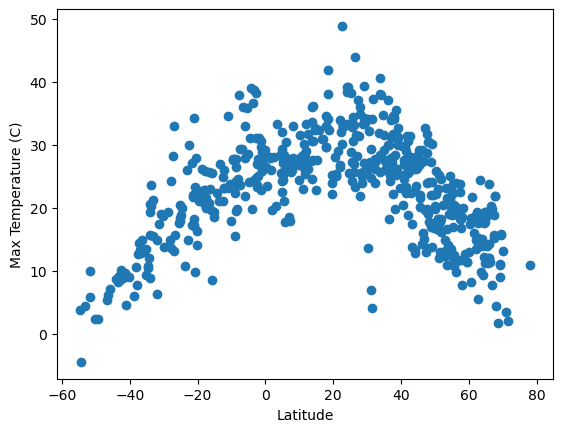

In [19]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)


# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

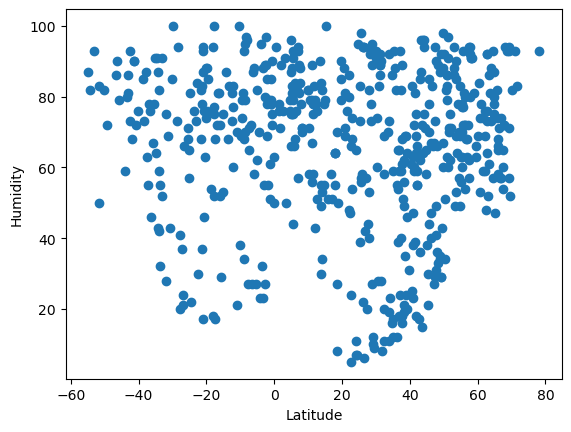

In [21]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

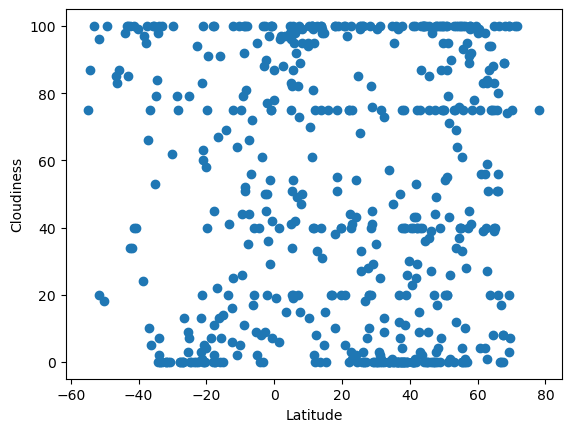

In [22]:
# Build the scatter plots for latitude vs. cloudiness
x_values= city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

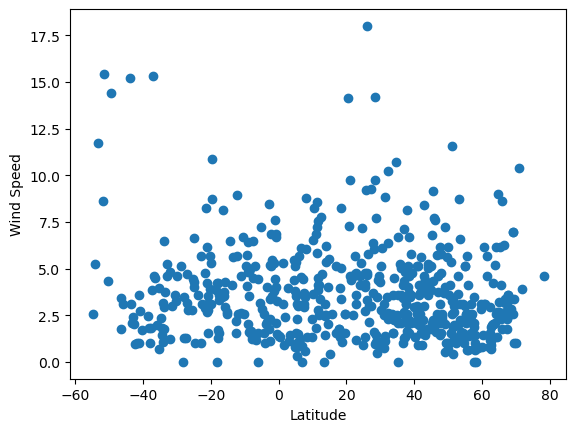

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
 

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ola,59.5833,151.2833,11.35,66,99,2.86,RU,1691255806
3,temryuk,45.2722,37.3811,29.12,30,0,6.81,RU,1691255703
5,coahuayana de hidalgo,18.7000,-103.6583,32.36,50,100,1.09,MX,1691255807
8,ouesso,1.6136,16.0517,25.97,71,96,0.93,CG,1691255807
9,nar'yan-mar,67.6713,53.0870,21.91,72,89,3.60,RU,1691255807


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,27.73,79,51,4.96,TK,1691255806
1,puerto ayora,-0.7393,-90.3518,28.98,90,42,4.02,EC,1691255806
4,edinburgh of the seven seas,-37.0676,-12.3116,13.33,78,10,15.31,SH,1691255807
6,puerto natales,-51.7236,-72.4875,5.84,83,96,8.64,CL,1691255807
7,san antonio de pale,-1.4014,5.6325,22.85,79,97,5.32,GQ,1691255807


###  Temperature vs. Latitude Linear Regression Plot

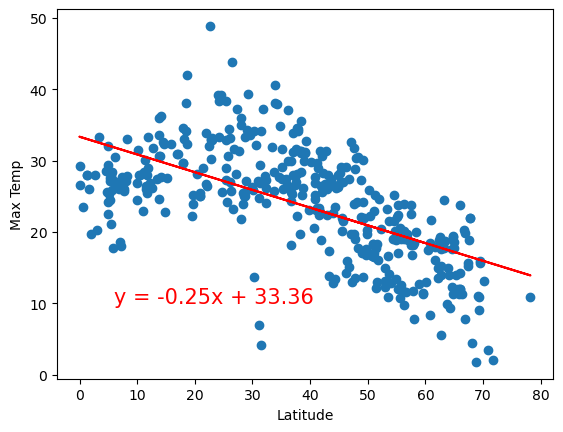

R squared: 0.3857650849181958


In [50]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R squared: {rvalue**2}")


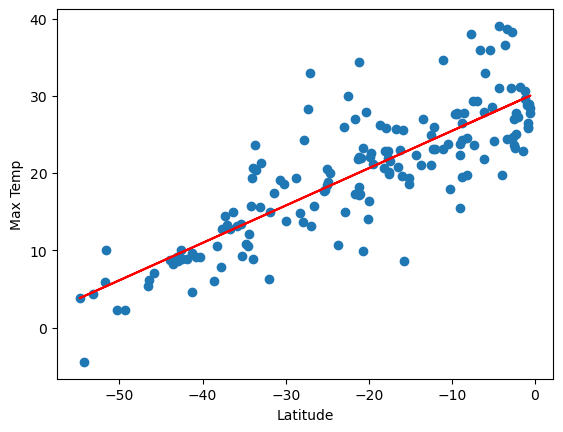

R squared: 0.6820550748090056


In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** It seems that there is a weak correlation(0.38) between Latitude and Temperature in the Northern Hemisphere and a moderate correlation (0.68) in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

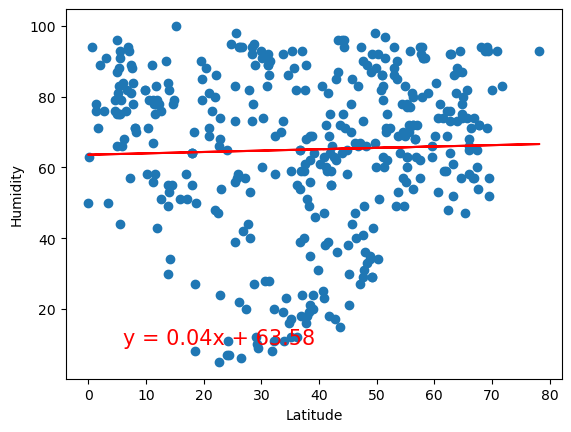

R squared: 0.0010584781481197938


In [48]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R squared: {rvalue**2}")

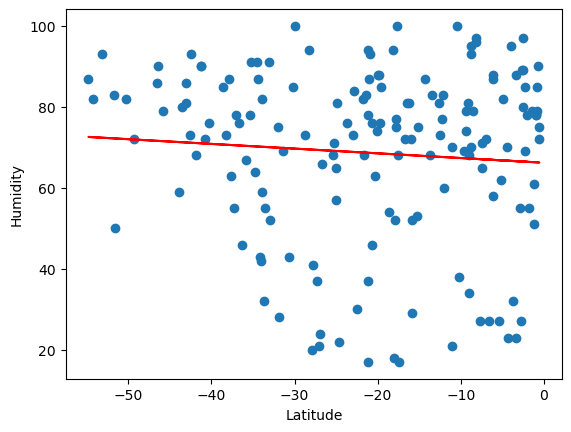

R squared: 0.0061899481315910495


In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"R squared: {rvalue**2}")


**Discussion about the linear relationship: There is no correlation between Latitude and humidity in either Hemisphere (NH: 0.001 and SH: 0.006).

### Cloudiness vs. Latitude Linear Regression Plot

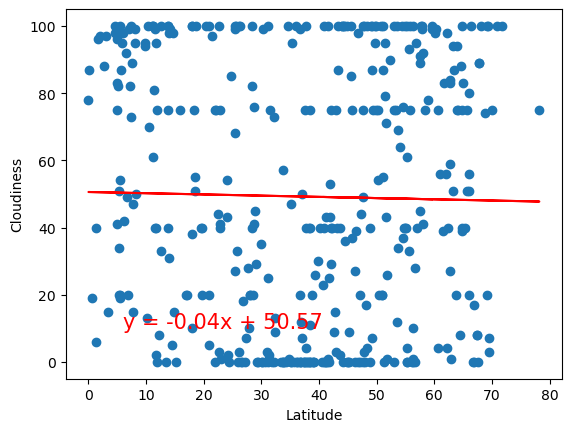

R squared: 0.00032947598808579463


In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R squared: {rvalue**2}")

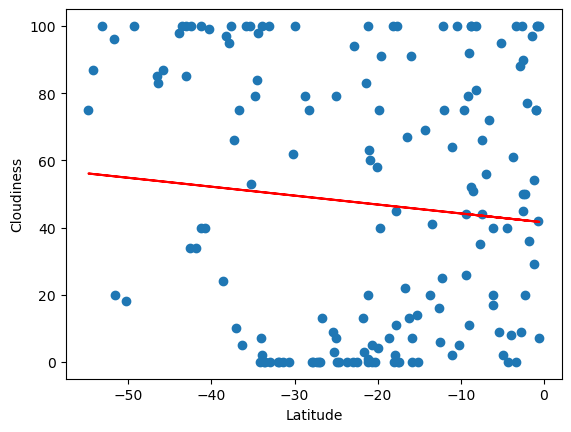

R squared: 0.009788296024277662


In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"R squared: {rvalue**2}")


**Discussion about the linear relationship:**There is no correlation between latitude and cloudiness in either Hemisphere (NH: 0.003, SH: 0.009)

### Wind Speed vs. Latitude Linear Regression Plot

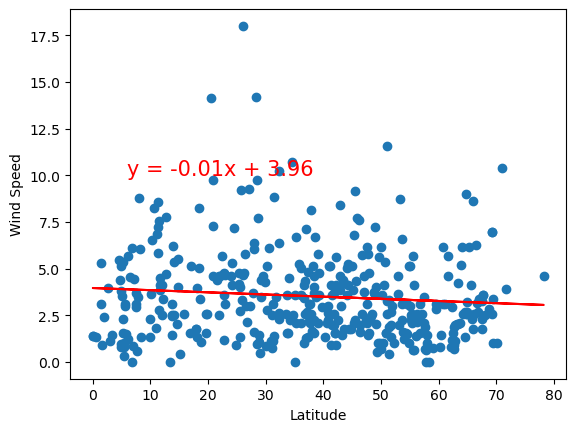

R squared: 0.00857328489871942


In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R squared: {rvalue**2}")

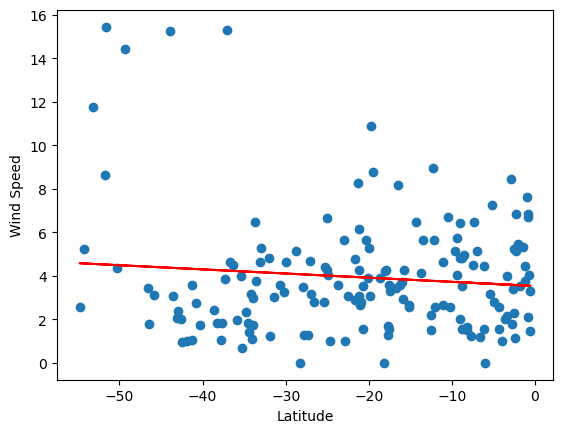

R squared: 0.010216476222474596


In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"R squared: {rvalue**2}")

**Discussion about the linear relationship:** There is no correlation between latitude and wind speed in either Hemisphere (NH: 0.008, SH: 0.01)